## Deep Color Palette Search: Analyzing Anime Characters' Colors  

### A. Introduction  
This notebook explores the relationship between highly rated anime and their character color palettes. By leveraging clustering techniques, we extract dominant colors from top anime and visualize the results as a refined color palette.  



### B. Data Preprocessing
Description:  
- Load and clean the anime dataset.  
- Extract relevant features for rating-based filtering.  

In [1]:
import pandas as pd

data_anime = pd.read_csv("RawAnimeData.csv")
data_anime = data_anime.drop(columns=["Unnamed: 0"])
data_anime = data_anime.drop_duplicates(subset=["jp_title"])
data_anime = data_anime.dropna()
data_anime.head()

,year,season,jp_title,img,Japanese,Episodes,Starting,Ending,Producers,Studios,Main Studio,Source,Age Rating,Rating Score,Reviewers,Rating Score Rank,Popularity Rank,Members,Favorites
0,2021,winter,Jujutsu Kaisen,https://cdn.myanimelist.net/images/anime/1171/...,呪術廻戦,24,3 Oct 2020,27 Mar 2021,"Mainichi Broadcasting System, TOHO animation, ...",MAPPA,MAPPA,Manga,R - 17+ (violence & profanity),8.56,1.809780e+13,110,13.0,2755845,93161
1,2021,winter,Yuru Camp△ Season 2,https://cdn.myanimelist.net/images/anime/1255/...,ゆるキャン△ SEASON2,13,7 Jan 2021,1 Apr 2021,"Half H.P Studio, MAGES., DeNA",C-Station,C-Station,Manga,PG-13 - Teens 13 or older,8.50,1.052540e+11,145,1091.0,238832,3105
2,2021,winter,Re:Zero kara Hajimeru Isekai Seikatsu 2nd Seas...,https://cdn.myanimelist.net/images/anime/1724/...,Re：ゼロから始める異世界生活,12,6 Jan 2021,24 Mar 2021,"AT-X, Memory-Tech, Hakuhodo DY Music & Picture...",White Fox,White Fox,Light novel,R - 17+ (violence & profanity),8.43,5.687810e+11,180,183.0,969121,13012
3,2021,winter,Mushoku Tensei: Isekai Ittara Honki Dasu,https://cdn.myanimelist.net/images/anime/1530/...,無職転生 ～異世界行ったら本気だす～,11,11 Jan 2021,22 Mar 2021,"Frontier Works, TOHO, Magic Capsule, TOHO anim...",Studio Bind,Studio Bind,Light novel,R - 17+ (violence & profanity),8.36,8.876810e+11,227,95.0,1438841,36751
4,2021,winter,Tensei shitara Slime Datta Ken 2nd Season,https://cdn.myanimelist.net/images/anime/1271/...,転生したらスライムだった件,12,12 Jan 2021,30 Mar 2021,Kodansha,8bit,8bit,Manga,PG-13 - Teens 13 or older,8.36,5.985960e+11,231,161.0,1033610,10879


In [2]:
data_anime = data_anime[["jp_title", "Main Studio", "Episodes", "Rating Score", "Rating Score Rank", "Popularity Rank", "Members", "Favorites", "Reviewers"]]
data_anime.head()

,jp_title,Main Studio,Episodes,Rating Score,Rating Score Rank,Popularity Rank,Members,Favorites,Reviewers
0,Jujutsu Kaisen,MAPPA,24,8.56,110,13.0,2755845,93161,1.809780e+13
1,Yuru Camp△ Season 2,C-Station,13,8.50,145,1091.0,238832,3105,1.052540e+11
2,Re:Zero kara Hajimeru Isekai Seikatsu 2nd Seas...,White Fox,12,8.43,180,183.0,969121,13012,5.687810e+11
3,Mushoku Tensei: Isekai Ittara Honki Dasu,Studio Bind,11,8.36,227,95.0,1438841,36751,8.876810e+11
4,Tensei shitara Slime Datta Ken 2nd Season,8bit,12,8.36,231,161.0,1033610,10879,5.985960e+11


### C. Clustering Anime by Rating Score and Reviewers
Description:
- Implement K-Means clustering to categorize anime into groups.
- Identify the cluster with the highest rating and number of reviewers.

In [3]:
import numpy as np
import matplotlib.pyplot as plt

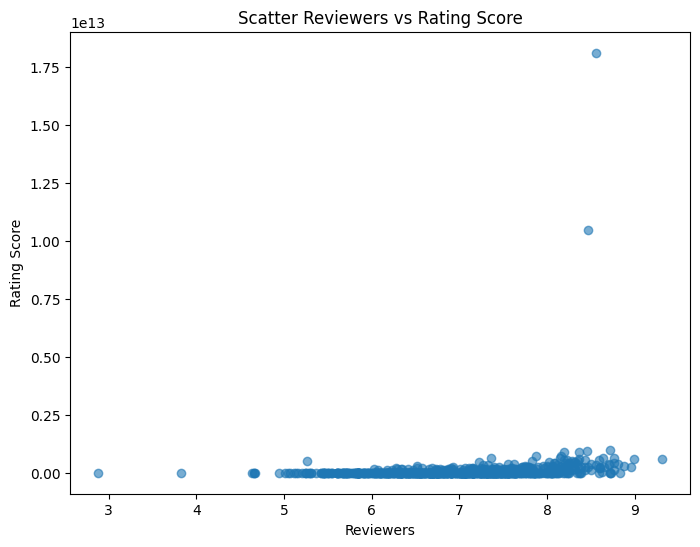

In [4]:
plt.figure(figsize=(8, 6))
plt.title("Scatter Reviewers vs Rating Score")
plt.xlabel("Reviewers")
plt.ylabel("Rating Score")

scatter = plt.scatter(
    x=data_anime["Rating Score"], 
    y=data_anime["Reviewers"], 
    alpha=0.6
);

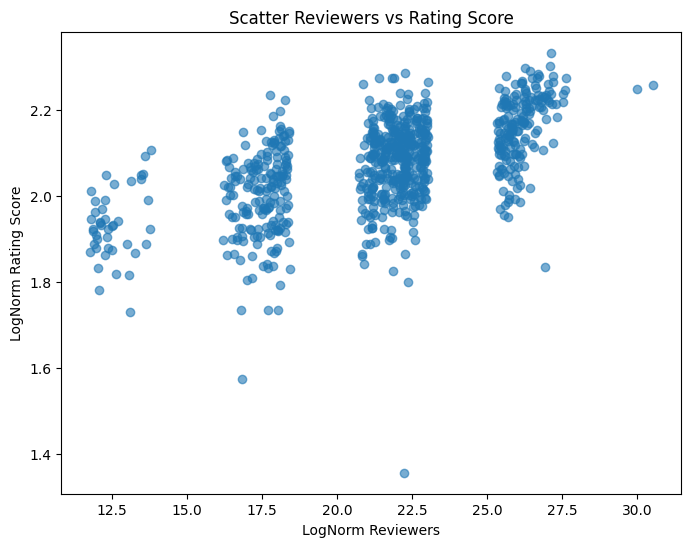

In [5]:
# Log Normal Transformation to Easily Spot the Differences
data_anime['log_norm_rating'] = np.log1p(data_anime['Rating Score'])
data_anime['log_norm_reviewers'] = np.log1p(data_anime['Reviewers'])

plt.figure(figsize=(8, 6))
plt.title("Scatter Reviewers vs Rating Score")
plt.xlabel("LogNorm Reviewers")
plt.ylabel("LogNorm Rating Score")

scatter = plt.scatter(
    x=data_anime["log_norm_reviewers"], 
    y=data_anime["log_norm_rating"], 
    alpha=0.6
);

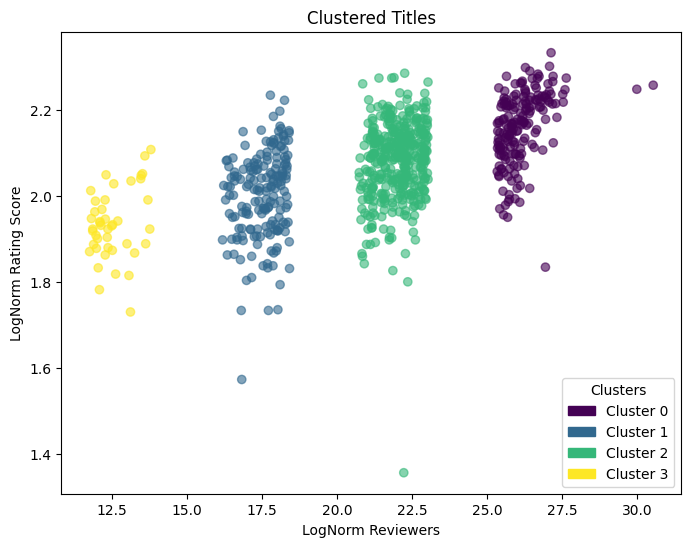

In [6]:
from sklearn.cluster import KMeans
from matplotlib.patches import Patch

cluster_features = ["log_norm_rating", "log_norm_reviewers"]

n_cluster = 4
kmeans = KMeans(n_clusters=n_cluster, random_state=42)
data_anime["Cluster"] = kmeans.fit_predict(data_anime[cluster_features])

plt.figure(figsize=(8, 6))
plt.title("Clustered Titles")
plt.xlabel("LogNorm Reviewers")
plt.ylabel("LogNorm Rating Score")


scatter = plt.scatter(
    x=data_anime["log_norm_reviewers"], 
    y=data_anime["log_norm_rating"], 
    c=data_anime["Cluster"],  
    cmap='viridis', 
    alpha=0.6
)

handles = [Patch(color=scatter.cmap(scatter.norm(c)), label=f"Cluster {c}") 
           for c in np.unique(data_anime["Cluster"])]
plt.legend(handles=handles, title="Clusters", loc="lower right")

plt.show()

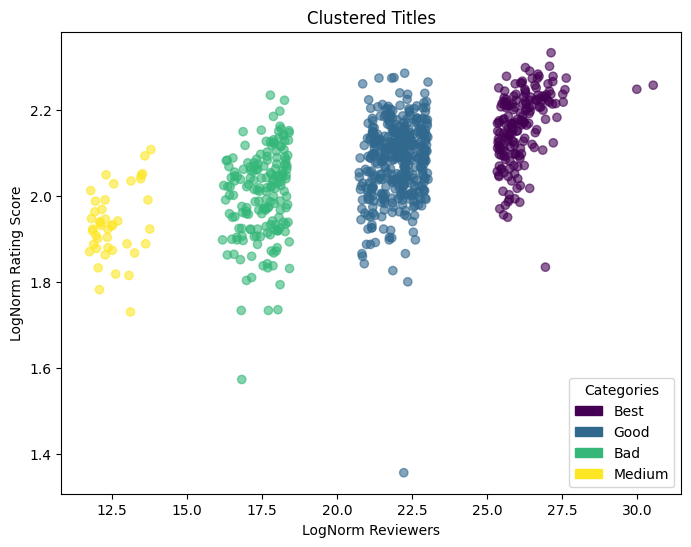

In [7]:
import matplotlib.patches as mpatches

data_anime['Category'] = data_anime['Cluster'].replace({0: 'Best', 1: 'Bad', 2: 'Good', 3: "Medium"})

plt.figure(figsize=(8, 6))
plt.title("Clustered Titles")
plt.xlabel("LogNorm Reviewers")
plt.ylabel("LogNorm Rating Score")

categories = data_anime["Category"].unique()
color_map = {cat: i for i, cat in enumerate(categories)}

scatter = plt.scatter(
    x=data_anime["log_norm_reviewers"], 
    y=data_anime["log_norm_rating"], 
    c=data_anime["Category"].map(color_map), 
    cmap='viridis', 
    alpha=0.6
)

legend_handles = [mpatches.Patch(color=scatter.cmap(scatter.norm(i)), label=cat) for cat, i in color_map.items()]

plt.legend(handles=legend_handles, title="Categories", loc="lower right")
plt.show()

### D. Selecting Top Studios
Description:
- Group the selected anime by Main Studio.
- Pick the top 2 studios with the most highly rated anime.

In [8]:
pd.pivot_table(data_anime, values="Rating Score", index="Category", aggfunc="mean")

,Rating Score
Category,
Bad,6.443389
Best,7.704333
Good,7.041566
Medium,5.936512


In [9]:
data_best = data_anime.loc[data_anime['Category'] == 'Best']
data_best.head()

,jp_title,Main Studio,Episodes,Rating Score,Rating Score Rank,Popularity Rank,Members,Favorites,Reviewers,log_norm_rating,log_norm_reviewers,Cluster,Category
0,Jujutsu Kaisen,MAPPA,24,8.56,110,13.0,2755845,93161,1.809780e+13,2.257588,30.526811,0,Best
1,Yuru Camp△ Season 2,C-Station,13,8.50,145,1091.0,238832,3105,1.052540e+11,2.251292,25.379642,0,Best
2,Re:Zero kara Hajimeru Isekai Seikatsu 2nd Seas...,White Fox,12,8.43,180,183.0,969121,13012,5.687810e+11,2.243896,27.066761,0,Best
3,Mushoku Tensei: Isekai Ittara Honki Dasu,Studio Bind,11,8.36,227,95.0,1438841,36751,8.876810e+11,2.236445,27.511878,0,Best
4,Tensei shitara Slime Datta Ken 2nd Season,8bit,12,8.36,231,161.0,1033610,10879,5.985960e+11,2.236445,27.117853,0,Best


In [10]:
value = ["Reviewers", "Rating Score"]

# top 5
pivot_studio = pd.pivot_table(
    data_best, values=value, index="Main Studio", aggfunc="mean"
).sort_values(by=value, ascending=False).head(5)

pivot_studio

,Rating Score,Reviewers
Main Studio,,
MAPPA,8.388333,3.442926e+12
Wit Studio,8.330000,2.381146e+12
ufotable,8.342500,5.986010e+11
White Fox,8.430000,5.687810e+11
Studio Bind,8.415000,5.382620e+11


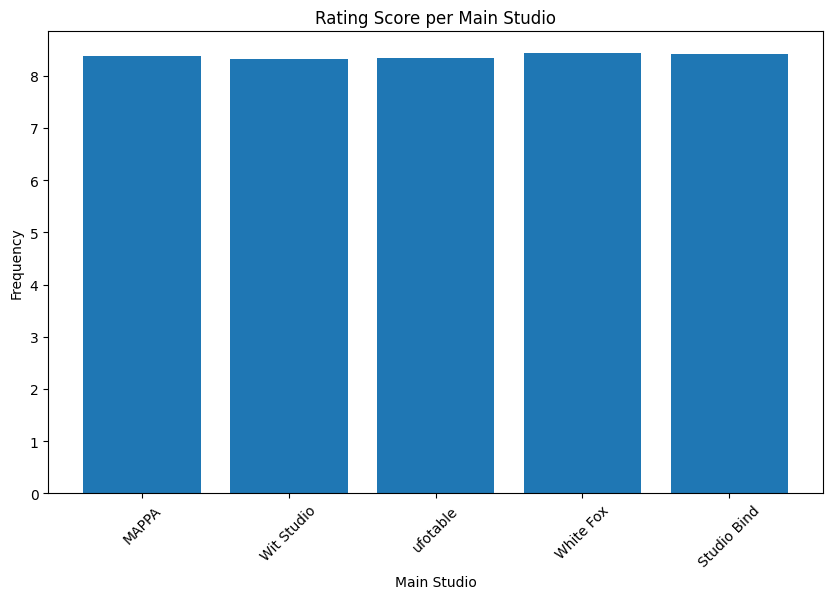

In [11]:
# Rating Score
plt.figure(figsize=(10, 6))
plt.bar(pivot_studio.index, pivot_studio["Rating Score"])
plt.xlabel("Main Studio")
plt.ylabel("Frequency")
plt.title("Rating Score per Main Studio")
plt.xticks(rotation=45)
plt.show();

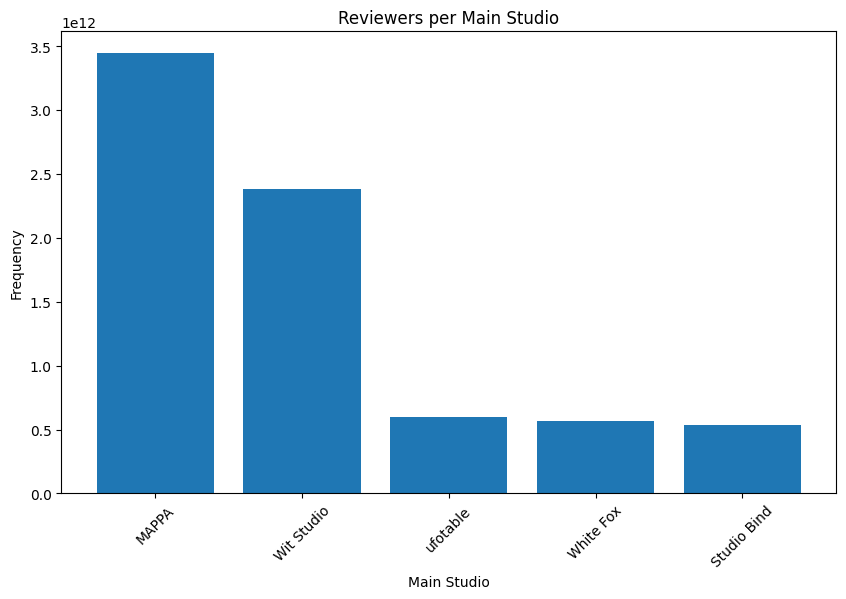

In [12]:
#  Reviewers
plt.figure(figsize=(10, 6))
plt.bar(pivot_studio.index, pivot_studio["Reviewers"])
plt.xlabel("Main Studio")
plt.ylabel("Frequency")
plt.title("Reviewers per Main Studio")
plt.xticks(rotation=45)
plt.show();

In [13]:
selected_studio = pivot_studio.index.values
print("The selected studio is:", selected_studio)

The selected studio is: ['MAPPA' 'Wit Studio' 'ufotable' 'White Fox' 'Studio Bind']


### E. Extracting & Clustering Character Colors
Description:
- Retrieve character images from the selected anime.
- Perform Hue-based clustering to classify colors into broad groups.

In [14]:
selected_dataset = data_best.loc[data_best['Main Studio'].isin(selected_studio)]

selected_dataset.head()

,jp_title,Main Studio,Episodes,Rating Score,Rating Score Rank,Popularity Rank,Members,Favorites,Reviewers,log_norm_rating,log_norm_reviewers,Cluster,Category
0,Jujutsu Kaisen,MAPPA,24,8.56,110,13.0,2755845,93161,1.809780e+13,2.257588,30.526811,0,Best
2,Re:Zero kara Hajimeru Isekai Seikatsu 2nd Seas...,White Fox,12,8.43,180,183.0,969121,13012,5.687810e+11,2.243896,27.066761,0,Best
3,Mushoku Tensei: Isekai Ittara Honki Dasu,Studio Bind,11,8.36,227,95.0,1438841,36751,8.876810e+11,2.236445,27.511878,0,Best
73,Vivy: Fluorite Eye's Song,Wit Studio,13,8.39,205,412.0,570600,11140,2.569810e+11,2.239645,26.272268,0,Best
185,Mushoku Tensei: Isekai Ittara Honki Dasu Part 2,Studio Bind,12,8.64,80,165.0,1016877,18964,6.369510e+11,2.265921,27.179959,0,Best


After we get the best title based on the "best" studio category

In [15]:
from ast import literal_eval

data_char = pd.read_csv("ColoredCharacterDataset.csv")
data_char = data_char.drop(columns=["Unnamed: 0"])
data_char = data_char.dropna()
data_char = data_char.drop_duplicates(subset="char_name")

selected_char = data_char.loc[data_char['jp_title'].isin(selected_dataset['jp_title'].tolist())].copy()
selected_char = selected_char.reset_index(drop=True)

selected_char['colors'] = selected_char['colors'].apply(lambda x: literal_eval(x) if isinstance(x, str) else x)

selected_char.head()

,jp_title,char_name,fav,img,colors
0,Mushoku Tensei: Isekai Ittara Honki Dasu,Rudeus Greyrat (ルーデウス・グレイラット),10221,https://cdn.myanimelist.net/images/characters/...,"[[221, 234, 246], [179, 215, 251], [140, 207, ..."
1,Mushoku Tensei: Isekai Ittara Honki Dasu,Roxy Migurdia (ロキシー・ミグルディア),9320,https://cdn.myanimelist.net/images/characters/...,"[[215, 231, 239], [182, 206, 247], [162, 196, ..."
2,Mushoku Tensei: Isekai Ittara Honki Dasu,Eris Boreas Greyrat (エリス・ボレアス・グレイラット),6158,https://cdn.myanimelist.net/images/characters/...,"[[202, 236, 253], [178, 224, 253], [205, 217, ..."
3,Mushoku Tensei: Isekai Ittara Honki Dasu,Sylphiette (シルフィエット),3018,https://cdn.myanimelist.net/images/characters/...,"[[216, 233, 243], [185, 221, 251], [172, 209, ..."
4,Mushoku Tensei: Isekai Ittara Honki Dasu,Orsted (オルステッド),769,https://cdn.myanimelist.net/images/characters/...,"[[143, 176, 246], [133, 167, 243], [138, 161, ..."


In [16]:
# import matplotlib.pyplot as plt
# import numpy as np
# import pandas as pd
# from sklearn.cluster import KMeans
# from collections import Counter
# from ast import literal_eval
# # Convert 'colors' from string to list if needed
# data_char = selected_char.copy()
# data_char['colors'] = data_char['colors'].apply(lambda x: literal_eval(x) if isinstance(x, str) else x)

# # Filter out invalid colors (must be a list of length 3)
# # data_char = data_char[data_char['colors'].apply(lambda x: isinstance(x, list) and len(x) == 3)]

# # Compute average color
# def average_color(matrix):
#     """Computes the mean RGB color."""
#     return np.mean(matrix, axis=0).astype(int).tolist()

# data_char["average_color"] = data_char["colors"].apply(average_color)
# data_char = data_char.loc[data_char['average_color'].apply(lambda x: isinstance(x, list))]


# color_test = np.array([color for sublist in data_char['average_color'] if isinstance(sublist, list) for color in sublist]).reshape(-1, 3)

# kmeans1 = KMeans(n_clusters=10, n_init=100, random_state=42)
# data_char['cluster'] = kmeans1.fit_predict(color_test)

In [17]:
# import pandas as pd
# import requests
# from PIL import Image
# import matplotlib.pyplot as plt
# from io import BytesIO

# for cluster in sorted(data_char.cluster.unique()):
#     print("#"*10, cluster, "#"*10)
#     vis_df = data_char.loc[data_char.cluster == cluster].sort_values(by='fav').sample(5)    
#     for url in vis_df.img:
#         # Fetch the image from the URL
#         response = requests.get(url)
#         img = Image.open(BytesIO(response.content))

#         # Display the image using matplotlib
#         plt.imshow(img)
#         plt.axis("off")  # Hide axes
#         plt.show()


In [18]:
# import numpy as np
# import pandas as pd
# from sklearn.cluster import KMeans

# # Define analysis functions
# def dominant_colors(matrix, n_clusters=3):
#     """Finds the top n dominant colors using K-Means clustering."""
#     kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=42)
#     kmeans.fit(matrix)
#     dominant_colors = kmeans.cluster_centers_.astype(int).tolist()
#     return dominant_colors

# def color_range(matrix):
#     """Finds the range (min and max values) for each RGB channel."""
#     min_color = np.min(matrix, axis=0).tolist()
#     max_color = np.max(matrix, axis=0).tolist()
#     return {"min": min_color, "max": max_color}

# def average_color(matrix):
#     """Computes the mean RGB color."""
#     return np.mean(matrix, axis=0).astype(int).tolist()

# def brightness_contrast(matrix):
#     """Computes the mean brightness and contrast (intensity range)."""
#     brightness = np.mean(matrix)
#     contrast = np.max(matrix) - np.min(matrix)
#     return {"brightness": brightness, "contrast": contrast}

# def grayscale_similarity(matrix):
#     """Checks if colors are close to grayscale (R≈G≈B)."""
#     diffs = np.std(matrix, axis=1)  # Standard deviation per row
#     grayscale_ratio = np.mean(diffs < 10)  # Ratio of near-grayscale colors
#     return grayscale_ratio

# data_char_sample = data_char.copy().head(50)
# # Apply functions to each row
# # data_char_sample["dominant_colors"] = data_char_sample["colors"].apply(dominant_colors)
# # data_char_sample["color_range"] = data_char_sample["colors"].apply(color_range)
# data_char_sample["average_color"] = data_char_sample["colors"].apply(average_color)
# # data_char_sample["brightness_contrast"] = data_char_sample["colors"].apply(brightness_contrast)
# # data_char_sample["grayscale_similarity"] = data_char_sample["colors"].apply(grayscale_similarity)

# # Display the DataFrame
# # pd.set_option("display.max_colwidth", None)  # Ensure full output visibility
# # data_char_sample[["jp_title", "char_name", "dominant_colors", "color_range", "average_color", "brightness_contrast", "grayscale_similarity"]]


In [19]:
all_colors = np.array([color for sublist in selected_char['colors'] if isinstance(sublist, list) for color in sublist])

print("Number of character:", len(selected_char['colors'])) 
print("Expected shape:", (len(selected_char['colors'])*30, 3))
print("Real shape:", all_colors.shape)
print("Flatten:", 9240*3)

Number of character: 120
Expected shape: (3600, 3)
Real shape: (3600, 3)
Flatten: 27720


In [20]:
df_rgb = pd.DataFrame(all_colors, columns=['R', 'G', 'B'])

In [21]:
def classify_color(r, g, b):
    """Classifies an RGB color into a general color category."""
    
    # Normalize RGB values
    r_norm, g_norm, b_norm = r / 255.0, g / 255.0, b / 255.0
    max_val = max(r_norm, g_norm, b_norm)
    min_val = min(r_norm, g_norm, b_norm)
    delta = max_val - min_val  # Color difference

    # Identify grayscale colors
    if max_val < 0.15:
        return "Black"
    elif min_val > 0.85:
        return "White"
    elif delta < 0.10:
        return "Gray"

    # Calculate hue value in degrees
    if delta == 0:
        hue = 0
    elif max_val == r_norm:
        hue = ((g_norm - b_norm) / delta) % 6
    elif max_val == g_norm:
        hue = ((b_norm - r_norm) / delta) + 2
    else:
        hue = ((r_norm - g_norm) / delta) + 4
    hue *= 60  # Convert to degrees

    # General color classification
    if 0 <= hue < 30 or 330 <= hue <= 360:
        return "Red"
    elif 30 <= hue < 60:
        return "Orange"
    elif 60 <= hue < 90:
        return "Yellow"
    elif 90 <= hue < 150:
        return "Green"
    elif 150 <= hue < 210:
        return "Cyan"
    elif 210 <= hue < 270:
        return "Blue"
    elif 270 <= hue < 330:
        return "Purple"
    
    return "Unknown"


# Apply classification to dataset
df_rgb['Color Category'] = df_rgb.apply(lambda row: classify_color(row['R'], row['G'], row['B']), axis=1)

df_rgb.head()

,R,G,B,Color Category
0,221,234,246,White
1,179,215,251,Blue
2,140,207,241,Cyan
3,166,193,219,Cyan
4,171,180,189,Gray


In [56]:
import statistics

def get_majority_color(colors):
    raw_colors = np.array(literal_eval(colors)).reshape(-1, 3)
    classified_colors = [classify_color(*color) for color in raw_colors]
    # classified_colors = [knn.predict(color.reshape(1, 3))[0] for color in raw_colors]
    # print(knn.predict(classified_colors[0].reshape(-1,3)))
    return statistics.mode(classified_colors) if classified_colors else "Unknown"

data_char['dominant_color'] = data_char['colors'].apply(get_majority_color)
data_char.head()


,jp_title,char_name,fav,img,colors,dominant_color
0,Horimiya,Izumi Miyamura (宮村 伊澄),16137,https://cdn.myanimelist.net/images/characters/...,"[[194, 222, 249], [185, 220, 250], [177, 200, ...",Gray
1,Horimiya,Kyouko Hori (堀 京子),12528,https://cdn.myanimelist.net/images/characters/...,"[[220, 237, 253], [208, 227, 250], [192, 203, ...",Blue
2,Horimiya,Yuki Yoshikawa (吉川 由紀),1502,https://cdn.myanimelist.net/images/characters/...,"[[195, 219, 249], [158, 226, 245], [141, 216, ...",Cyan
3,Horimiya,Kyousuke Hori (堀 京介),1061,https://cdn.myanimelist.net/images/characters/...,"[[221, 236, 245], [202, 232, 253], [192, 219, ...",Gray
4,Horimiya,Honoka Sawada (沢田 ほのか),433,https://cdn.myanimelist.net/images/characters/...,"[[226, 234, 243], [191, 210, 239], [174, 201, ...",Gray


In [65]:
test_slice = ['Blue', 'Gray', 'Red', 'Cyan', 'Orange', 'Purple', 'Green', 'Yellow']
test_data = data_char.loc[data_char.dominant_color.isin(test_slice)]
# test_data['dominant_color'].unique()
test_anime = data_anime.loc[data_anime.jp_title.isin(test_data.jp_title)]
test_anime.head()

,jp_title,Main Studio,Episodes,Rating Score,Rating Score Rank,Popularity Rank,Members,Favorites,Reviewers,log_norm_rating,log_norm_reviewers,Cluster,Category
0,Jujutsu Kaisen,MAPPA,24,8.56,110,13.0,2755845,93161,1.809780e+13,2.257588,30.526811,0,Best
1,Yuru Camp△ Season 2,C-Station,13,8.50,145,1091.0,238832,3105,1.052540e+11,2.251292,25.379642,0,Best
2,Re:Zero kara Hajimeru Isekai Seikatsu 2nd Seas...,White Fox,12,8.43,180,183.0,969121,13012,5.687810e+11,2.243896,27.066761,0,Best
3,Mushoku Tensei: Isekai Ittara Honki Dasu,Studio Bind,11,8.36,227,95.0,1438841,36751,8.876810e+11,2.236445,27.511878,0,Best
4,Tensei shitara Slime Datta Ken 2nd Season,8bit,12,8.36,231,161.0,1033610,10879,5.985960e+11,2.236445,27.117853,0,Best


In [71]:
for i in range(5):
    print(test_anime.jp_title[i])
    print(data_char.loc[data_char.jp_title == test_anime.jp_title[i]].dominant_color.value_counts())
    print("#"*50)

Jujutsu Kaisen
dominant_color
Blue      5
Gray      2
Cyan      1
Green     1
Orange    1
Name: count, dtype: int64
##################################################
Yuru Camp△ Season 2
dominant_color
Gray    6
Blue    2
Red     1
Cyan    1
Name: count, dtype: int64
##################################################
Re:Zero kara Hajimeru Isekai Seikatsu 2nd Season Part 2
dominant_color
Gray    4
Blue    4
Red     2
Name: count, dtype: int64
##################################################
Mushoku Tensei: Isekai Ittara Honki Dasu
dominant_color
Blue    6
Gray    3
Cyan    1
Name: count, dtype: int64
##################################################
Tensei shitara Slime Datta Ken 2nd Season
dominant_color
Blue    4
Red     3
Gray    2
Cyan    1
Name: count, dtype: int64
##################################################


In [57]:
pivot_color = pd.pivot_table(data_char, values='fav', index='dominant_color', aggfunc='sum').sort_values(by='fav', ascending=False)
pivot_color

,fav
dominant_color,
Blue,1393501
Gray,905221
Cyan,322589
Red,254978
Orange,35029
Purple,28280
Green,13529
Yellow,1357
Unknown,520


########## Black ##########


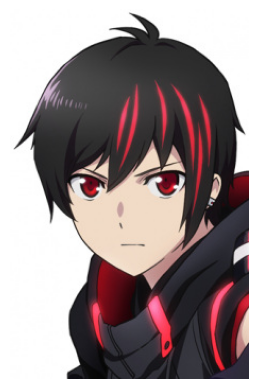

########## Blue ##########


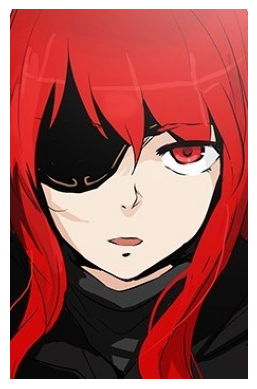

########## Cyan ##########


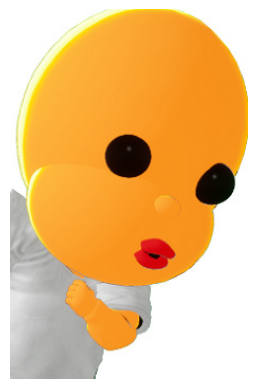

########## Gray ##########


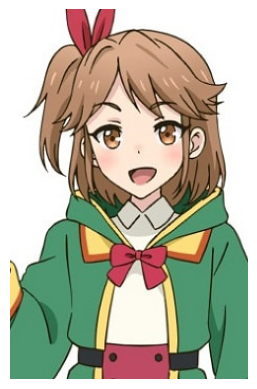

########## Orange ##########


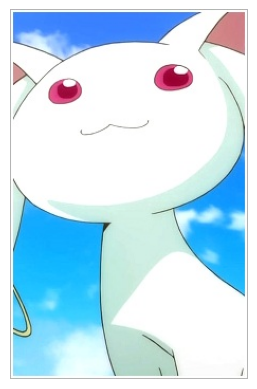

########## Purple ##########


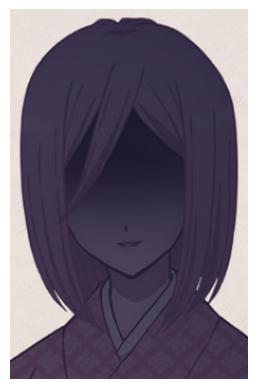

########## Unknown ##########


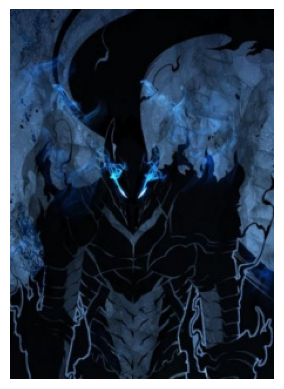

########## White ##########


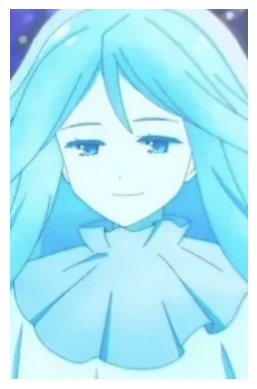

In [55]:
import requests
from PIL import Image
from io import BytesIO

for cluster in sorted(data_char['dominant_color'].unique()):
    print("#"*10, cluster, "#"*10)
    vis_df = data_char.loc[data_char['dominant_color'] == cluster].sort_values(by='fav').sample()
    for url in vis_df.img:
        # Fetch the image from the URL
        response = requests.get(url)
        img = Image.open(BytesIO(response.content))

        # Display the image using matplotlib
        plt.imshow(img)
        plt.axis("off")  # Hide axes
        plt.show()


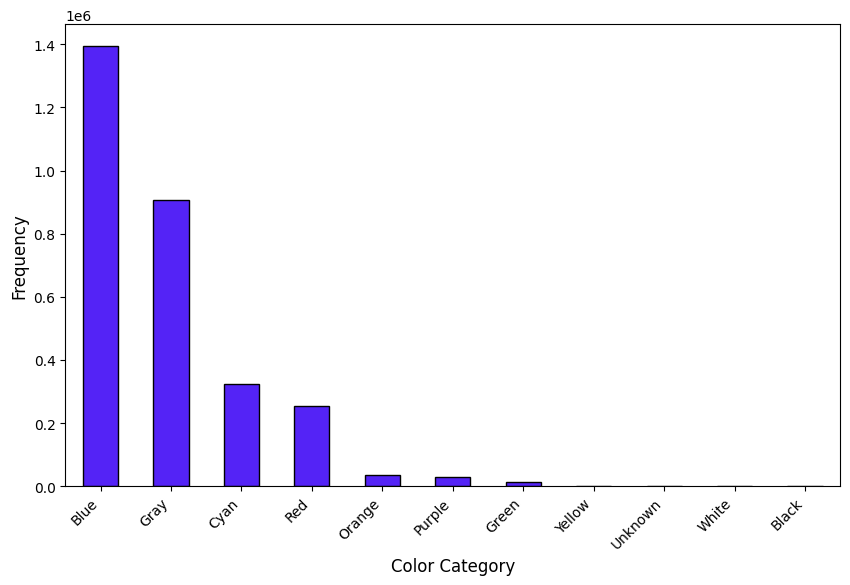

In [ ]:
import matplotlib.pyplot as plt

ax = pivot_color.plot(kind='bar', figsize=(10, 6), color="#5423f6", edgecolor='black')

ax.legend().remove()

plt.xlabel("Color Category", fontsize=12)
plt.ylabel("Frequency", fontsize=12)

plt.xticks(rotation=45, ha='right')

plt.show()

### F. Refining the Final Color Palette
Description:
- Within each hue group, further cluster colors to extract dominant shades.
- Display the final deep color palette based on anime character trends.

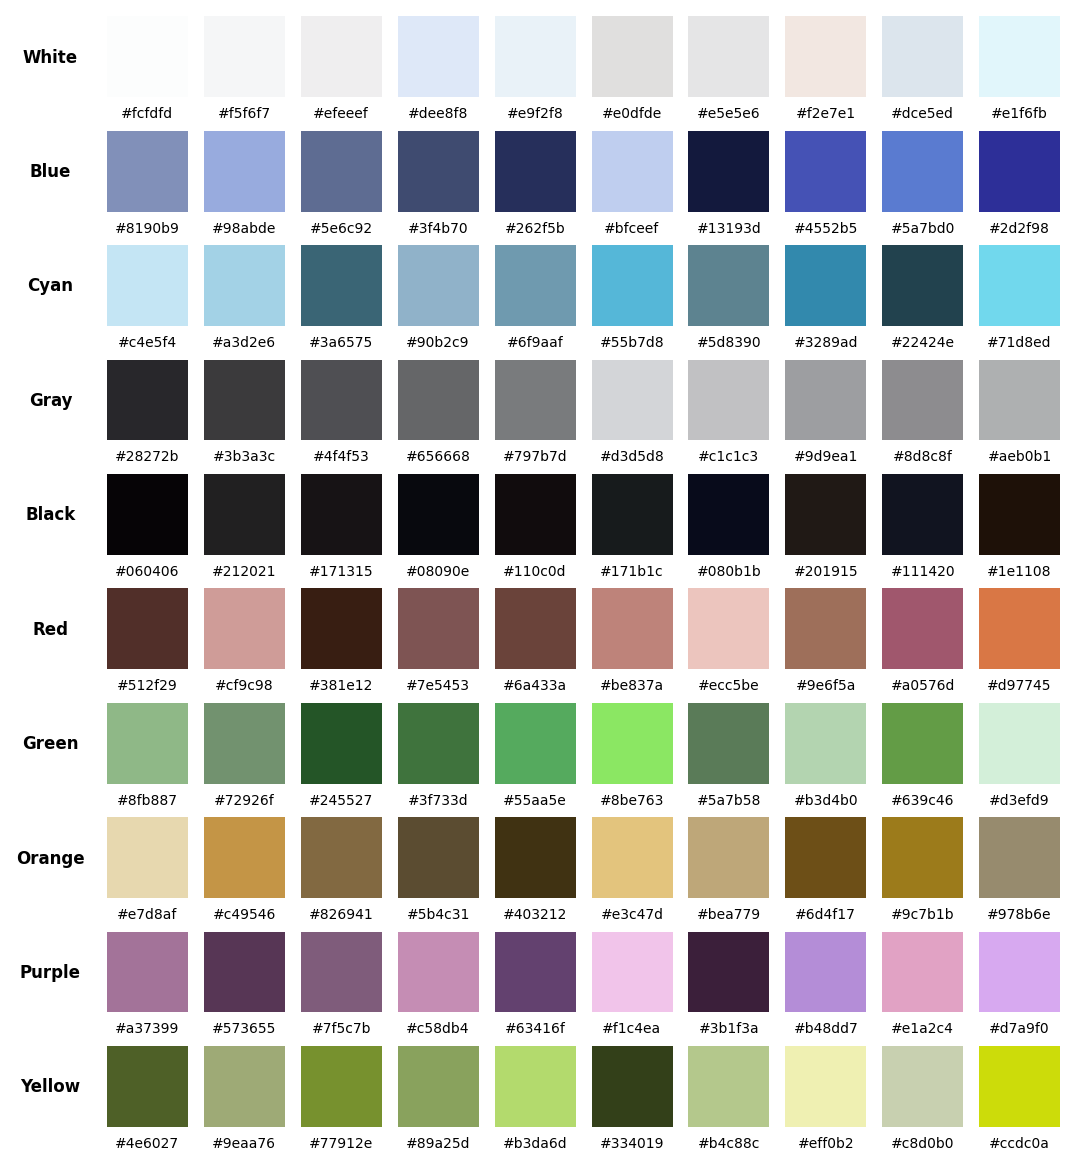

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from collections import Counter

container = {}

for color in df_rgb['Color Category'].unique():
    # Extract RGB values for the current color category
    data = df_rgb.loc[df_rgb['Color Category'] == color].to_numpy()[:, :-1].astype(float)
    n_samples = data.shape[0]

    if n_samples > 1:
        # Dynamically set clusters based on available data
        n_clusters = min(n_samples, 10)
        
        # Initialize and fit KMeans
        kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init='auto')
        kmeans.fit(data)

        # Get cluster sizes and sort centers by frequency
        cluster_counts = Counter(kmeans.labels_)
        sorted_centers = sorted(kmeans.cluster_centers_, 
                              key=lambda x: -cluster_counts[np.where((kmeans.cluster_centers_ == x).all(axis=1))[0][0]])
        
        colors_to_display = np.array(sorted_centers)
    else:
        colors_to_display = data

    # Store original values before normalization
    container[color] = colors_to_display.copy()

# Normalize colors for visualization
for key in container:
    container[key] /= 255.0

# Determine the maximum number of colors in any category
max_colors = max(len(colors) for colors in container.values())

# Create figure
fig, ax = plt.subplots(len(container), max_colors + 1, figsize=(15, len(container) * 1.5))
fig.subplots_adjust(left=0.2, right=0.9, top=0.85, bottom=0.1)

for row, (color_name, color_values) in enumerate(container.items()):
    # Display category name on the left
    ax[row, 0].text(0.5, 0.5, color_name, fontsize=12, ha='center', va='center', fontweight='bold')
    ax[row, 0].axis('off')
    
    # Display color swatches
    for col in range(max_colors):
        ax[row, col + 1].axis('off')
        if col < len(color_values):
            ax[row, col + 1].imshow([[color_values[col]]])
            
            # Convert RGB to hex
            rgb = (color_values[col] * 255).astype(int)
            hex_color = "#{:02x}{:02x}{:02x}".format(rgb[0], rgb[1], rgb[2])
            
            # Display hex code at the top
            ax[row, col + 1].text(0.5, -0.2, hex_color, fontsize=10, ha='center', va='center', transform=ax[row, col + 1].transAxes)

plt.show()


### G. Conclusion
Description:
- This analysis provides insights into anime color aesthetics and their relation to top-rated anime.
- The final palette represents dominant and visually appealing colors found in the best anime titles.

In [ ]:
# conlusion